# Tehtävä 1
### Aihe: Keras Functional API:n käyttö
2,5 pistettä

1. Luo alla olevan kuvan mukainen neuroverkko, jossa on useampi sisääntulo.
    * Kerroksien neuronien määrällä tai aktivaatiofunktiolla ei ole väliä, määritä ne itse vapaasti.
2. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Käytä concatenate - kerrosta yhdistääksesi Input2 ja sitä edeltävän Densen ulostulo. Sama homma Input3:lle. Katso esimerkki materiaalista Keras - otsikon alta.
* Add kerroksen dokumentaatio: https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th

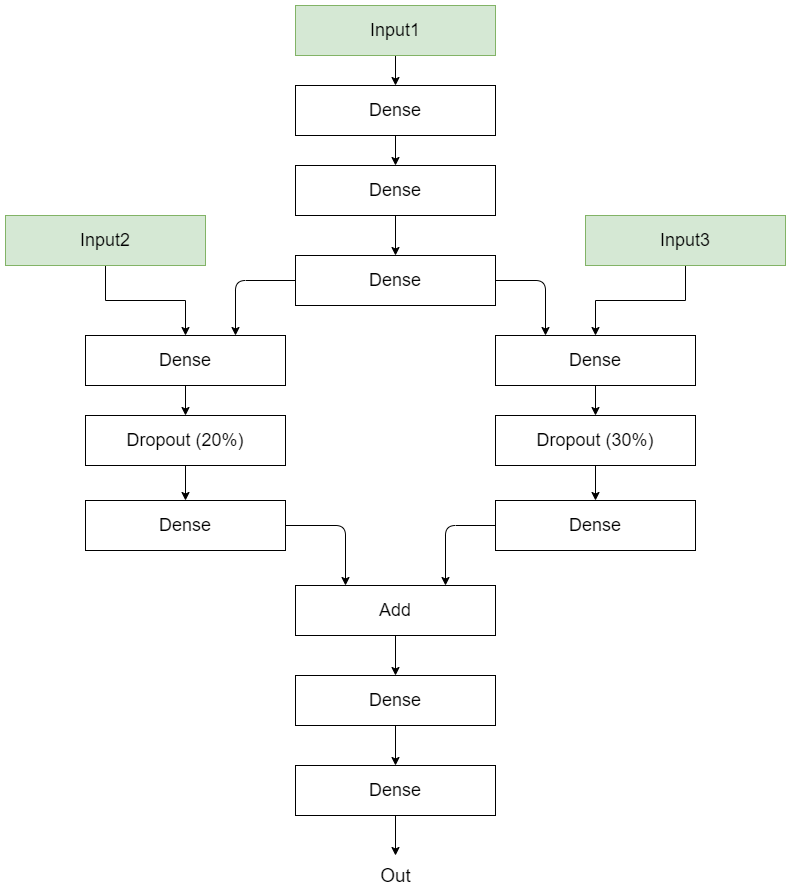

In [1]:
from IPython.display import Image
Image('../img/keras_functional_tehtävä.png')

In [1]:
# Tehtävän toteutus
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

import os
os.environ['PATH'] = os.environ['PATH']+';'+ os.environ['CONDA_PREFIX'] + r"\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz"

input1 = tf.keras.Input(shape=(2,))
input2 = tf.keras.Input(shape=(1,))
input3 = tf.keras.Input(shape=(3,))

dense1_1 = tf.keras.layers.Dense(2,activation='relu')(input1)
dense1_2 = tf.keras.layers.Dense(2,activation='relu')(dense1_1)
dense1_3 = tf.keras.layers.Dense(2,activation='relu')(dense1_2)

# Yhdistetään dense1_3 sekä input2- että input3-kerroksen kanssa
concat1 = tf.keras.layers.concatenate([dense1_3,input2])
concat2 = tf.keras.layers.concatenate([dense1_3,input3])

dense2_1 = tf.keras.layers.Dense(3,activation='relu')(concat1)
layer1 = tf.keras.layers.Dropout(.2, input_shape=(3,))
drop1 = layer1(dense2_1, training=True)
dense2_2 = tf.keras.layers.Dense(2,activation='relu')(drop1)

dense3_1 = tf.keras.layers.Dense(3,activation='relu')(concat2)
layer2 = tf.keras.layers.Dropout(.3, input_shape=(3,))
drop2 = layer2(dense3_1, training=True)
dense3_2 = tf.keras.layers.Dense(2,activation='relu')(drop2)

added = tf.keras.layers.add([dense2_2, dense3_2])
dense1_4 = tf.keras.layers.Dense(2,activation='relu')(added)
dense1_5 = tf.keras.layers.Dense(2,activation='relu')(dense1_4)

output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(dense1_5)

model_functional = tf.keras.Model(inputs=[input1,input2,input3], # Määritellään useampi sisääntulo neuroverkolle käyttäen listaa.
                               outputs=output_layer)
tf.keras.utils.plot_model(model_functional,dpi=70,show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [2]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita luomasi malli model_functional - muuttujaan.
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 2)            6           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            6           dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            6           dense_1[0][0]                    
______________________________________________________________________________________________

# Tehtävä 2
### Aihe: Konvoluutioneuroverkko ja feature - matriisit
2,5 pistettä

1. Lataa MNIST datasetti.
2. Luo konvoluutioneuroverkko, joka vie klassifiointikerroksille 32 feature - matriisia, joiden korkeus ja leveys on 6.
3. Todista neuroverkon toimivuus kouluttamalla MNIST datasettiä muutama epookki.
4. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Käytä useita konvoluutio ja Max Pooling - kerroksia saavuttaaksesi oikean korkeuden ja leveyden feature - matriiseille. Käytä apuna ulostulon laskukaavoja materiaaleista.
    * Mahdollisia yhdistelmiä on monta, ei yhtä ainoaa ratkaisua. 
* Jos koneellasi loppuu muisti kesken tai konvoluutioverkon koulutus kestää liian kauan, pienennä MNIST datasetin kokoa esim. kymmenesosaan.
* Klassifikaatiokerrokset = Flatten, Dense kerrokset konvoluutiokerrosten jälkeen.

In [19]:
# Tehtävän toteutus
# Ladataan MNIST datasetti
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape)

# Muokataan MNIST kuvien muoto muotoon: (kuvien määrä, koko pystysuunnassa, koko vaakasuunnassa, värikanavien määrä)
train_X = train_X.reshape((train_X.shape[0],28,28,1))

# Input-kerros
model_input = tf.keras.Input(shape=(28,28,1)) 
# Konvoluutio- ja Max Pooling -kerrokset
model_conv = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=1, padding='same')(model_input)
model_maxpool = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(model_conv)
model_conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(2,2), padding='same')(model_maxpool)
model_maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=1)(model_conv2)

# Flatten- ja Dense-kerrokset
model_flatten = tf.keras.layers.Flatten()(model_maxpool2)
model_dense = tf.keras.layers.Dense(128,activation='relu')(model_flatten)
model_out = tf.keras.layers.Dense(10,activation='softmax')(model_dense)

model_mnist = tf.keras.Model(inputs=model_input,
                        outputs=model_out)

# Neuroverkon koulutus
model_mnist.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model_mnist.fit(train_X,
          train_y,
          epochs=5)

layer_output = model.layers[4].output.shape



(60000, 28, 28)
Epoch 1/5
1875/1875 [==============================] - 117s 57ms/step - loss: 0.6092 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.1145 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0867 - accuracy: 0.9751s - loss: 0.0861 - ac - ETA: 0s - loss: 0.0866 - accu
Epoch 4/5
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0769 - accuracy: 0.9777s - l
Epoch 5/5
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0666 - accuracy: 0.9804


In [20]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 

# Sijoita layer_output muuttujaan sen konvoluutikerroksen ulostulon muoto, missä kerroksesta tulee ulos 32 feature matriisia, joiden korkeus ja leveys on 6
# Esim. layer_output = model.layers[5].output.shape
print(layer_output)
# Sijoita luomasi malli model_mnist - muuttujaan.
model_mnist.summary()

(None, 6, 6, 32)
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 32)          4128      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128) 

# Tehtävä 3
### Aihe: Siirto-oppiminen
2,5 pistettä

1. Luo alla olevan kuvan mukainen neuroverkkomalli.
2. Lataa malliin painoarvot "weights.h5" tiedostosta.
3. Aja tehtävän viimeinen "Vastaukset" solu.

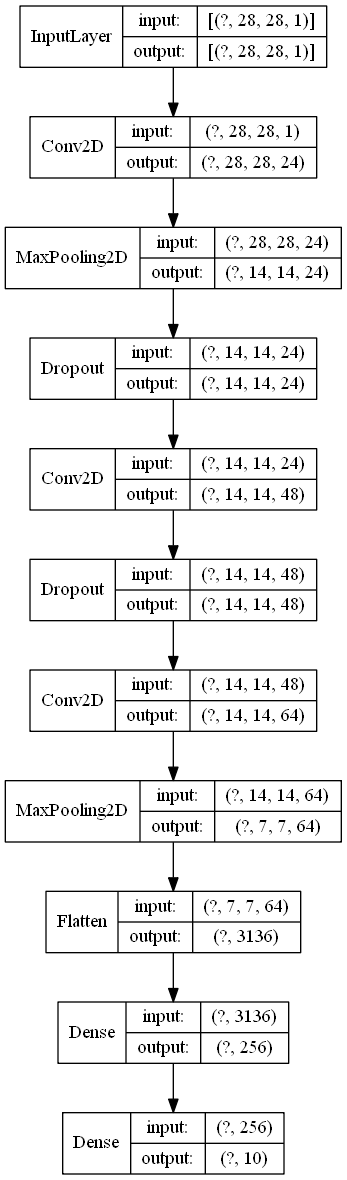

In [2]:
Image('../img/cnnmalli.png')

Vinkkejä:
* Käytä Conv2D - kerroksissa aktivaatiofunktiona 'relu'
* Katso konvoluutiokerroksen ulostulosta, kuinka monta filtteriä tulisi määrittää.
* Konvoluutiokerroksissa kernelin koko on (5,5). Katso materiaaleista, mikä padding ja stride tulee olla, että ulostulolla on sama leveys ja korkeus kuin sisääntulolla.
* MaxPooling2D:ssä pool_size on (2,2). Mikä tulee olla askel (strides) parametri, että sisääntulo puolittuu?
* Dropout deaktivoi ensimmäisessä Dropout - kerroksessa 20% neuroneista ja toisessa 40%.

In [70]:
# Tehtävän toteutus
# Input-kerros
model_input = tf.keras.Input(shape=(28,28,1)) 
# Konvoluutio-, Max Pooling - ja Dropout-kerrokset
model_conv1 = tf.keras.layers.Conv2D(filters=24, kernel_size=(5,5),strides=1, padding='same', activation='relu')(model_input)
model_maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(model_conv1)
layer1 = tf.keras.layers.Dropout(.2, input_shape=(14,14,24))
drop1 = layer1(model_maxpool1, training=True)
model_conv2 = tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5),strides=1, padding='same', activation='relu')(drop1)
layer2 = tf.keras.layers.Dropout(.4, input_shape=(14,14,48))
drop2 = layer2(model_conv2, training=True)
model_conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5),strides=1, padding='same', activation='relu')(drop2)
model_maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(model_conv3)

# Flatten- ja Dense-kerrokset
model_flatten = tf.keras.layers.Flatten()(model_maxpool2)
model_dense = tf.keras.layers.Dense(256,activation='relu')(model_flatten)
model_out = tf.keras.layers.Dense(10,activation='softmax')(model_dense)


model_cnn = tf.keras.Model(inputs=model_input,
                        outputs=model_out)


# Ladataan painoarvot tiedostosta malliin
model_cnn.load_weights('weights.h5')


In [71]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita luomasi malli model_cnn - muuttujaan
model_cnn.summary()

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 48)        28848     
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 14, 14, 64)        768

# Tehtävä 4
### Aihe: Siirto-oppiminen
2,5 pistettä
 
1. Lataa Fashion MNIST datasetti ajamalla tehtävän ensimmäinen solu.
2. Poista äskeisessä tehtävässä luodusta mallista klassifikaatiokerrokset. (eli Flatten ja kaikki sen jälkeiset kerrokset)
3. Jäädytä loput kerrokset.
4. Luo klassifikaatiokerrokset ja lisää ne malliin.
5. Kouluta mallia Fashion MNIST datasetillä muutama kierros (epoch) käyttäen train_X ja train_y koulutusdataa.
6. Aja tehtävän viimeinen "Vastaukset" solu. 

Vinkkejä:
* Fashion MNIST on MNISTin tapainen datasetti
    * Muokkaa Fashion MNIST datasetin kuvien muoto, jotta ne voi syöttää neuroverkolle.
    * Normalisoi datasetin arvot
* Käy neuroverkon kerrokset läpi ja muuta kerrosten 'trainable' parametriä. Näin voit jäädyttää kerroksen.
* Klassifikaatiokerrokset = Flatten, Dense kerrokset.

In [86]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()
# Tehtävän toteutus tähän
import numpy as np
print(train_X.shape)
# Muokataan Fashion MNIST kuvien muoto muotoon: (kuvien määrä, koko pystysuunnassa, koko vaakasuunnassa, värikanavien määrä)
train_X = train_X.reshape((train_X.shape[0],28,28,1))
test_X = test_X.reshape((test_X.shape[0],28,28,1))
print(train_X.shape)

#Pikseliarvot välillä 0-255 (musta-valkoinen)
maxElement = np.amax(train_X)
print('Max element from Numpy Array : ', maxElement)

# Muunnetaan integer-luvut float-muotoon
train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# Normalisoidaan välille 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

maxElement = np.amax(train_norm)
print('Max element from Numpy Array : ', maxElement)

model_cnn.summary()

# Poistetaan klassifikaatiokerrokset. Uuden mallin viimeinen kerros neljänneksi viimeinen
model_out = model_cnn.layers[-4].output
model_cnn2 = tf.keras.Model(inputs=model_cnn.input,
                             outputs=model_out)

model_cnn2.summary()

# Jäädytetään mallin loput kerrokset
for layer in model_cnn2.layers:
    layer.trainable = False
    
# Luodaan uudet klassifikaatiokerrokset ja lisätään ne uuteen malliin
new_flatten = tf.keras.layers.Flatten()(model_cnn2.output)
new_dense = tf.keras.layers.Dense(256,activation='relu')(new_flatten)
new_out = tf.keras.layers.Dense(10,activation='softmax')(new_dense)
    
model_new = tf.keras.Model(inputs=model_cnn2.input,
                             outputs=new_out)
model_new.summary()

model_new.compile(loss='sparse_categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     metrics=['accuracy'])

# Koulutetaan mallia
model_new.fit(train_X,
                train_y,
                epochs=5)

# Mitataan koulutetun mallin tarkkuus testidatasetin avulla
results = model_new.evaluate(test_X,
                               test_y,
                               verbose=0)

(60000, 28, 28)
(60000, 28, 28, 1)
Max element from Numpy Array :  255
Max element from Numpy Array :  1.0
Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 48)        28848     
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 48)        0         
_________________

C:\Users\Marjo\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/5
1875/1875 [==============================] - 476s 249ms/step - loss: 13.3308 - accuracy: 0.7552
Epoch 2/5
1875/1875 [==============================] - 444s 237ms/step - loss: 2.5267 - accuracy: 0.7580
Epoch 3/5
1875/1875 [==============================] - 436s 233ms/step - loss: 0.9490 - accuracy: 0.7550
Epoch 4/5
1875/1875 [==============================] - 451s 240ms/step - loss: 0.6865 - accuracy: 0.7809
Epoch 5/5
1875/1875 [==============================] - 451s 240ms/step - loss: 0.5680 - accuracy: 0.8047


In [88]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'], jotta näät, kuinka suuri osa neuroverkon ennustuksista on oikein.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Test Loss:0.6049572333812714 Test Accuracy:79.88%
